# Analyze audio_features of songs of an album using the Spotify Web API
This example 

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# read creditals (Client ID and Client Secret) from file
creditals = []
f = open('creditals.txt', 'r')
for line in f:
	#add line to creditals list (remove trailing whitespace characters)
	creditals.append(line.rstrip())

# create Spotify object with creditals
client_credentials_manager = SpotifyClientCredentials(creditals[0], creditals[1])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

name = 'Radiohead'
results = sp.search(q='artist:' + name, type='artist')
print results


{u'artists': {u'items': [{u'genres': [u'alternative rock', u'indie rock', u'melancholia', u'modern rock', u'permanent wave', u'rock'], u'name': u'Radiohead', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, u'popularity': 81, u'uri': u'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb', u'href': u'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', u'followers': {u'total': 2310572, u'href': None}, u'images': [{u'url': u'https://i.scdn.co/image/afcd616e1ef2d2786f47b3b4a8a6aeea24a72adc', u'width': 640, u'height': 640}, {u'url': u'https://i.scdn.co/image/563754af10b3d9f9f62a3458e699f58c4a02870f', u'width': 320, u'height': 320}, {u'url': u'https://i.scdn.co/image/4067ea225d8b42fa6951857d3af27dd07d60f3c6', u'width': 160, u'height': 160}], u'type': u'artist', u'id': u'4Z8W4fKeB5YxbusRsdQVPb'}, {u'genres': [], u'name': u'Radiohead Tribute Band', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/0ADkBHZhR2cVfANgK5gHQO'}, u'popularity': 13, u

In [4]:
radioheadID = '4Z8W4fKeB5YxbusRsdQVPb'
artist = sp.artist(radioheadID)
print artist

{u'genres': [u'alternative rock', u'indie rock', u'melancholia', u'modern rock', u'permanent wave', u'rock'], u'name': u'Radiohead', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, u'popularity': 81, u'uri': u'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb', u'href': u'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', u'followers': {u'total': 2310572, u'href': None}, u'images': [{u'url': u'https://i.scdn.co/image/afcd616e1ef2d2786f47b3b4a8a6aeea24a72adc', u'width': 640, u'height': 640}, {u'url': u'https://i.scdn.co/image/563754af10b3d9f9f62a3458e699f58c4a02870f', u'width': 320, u'height': 320}, {u'url': u'https://i.scdn.co/image/4067ea225d8b42fa6951857d3af27dd07d60f3c6', u'width': 160, u'height': 160}], u'type': u'artist', u'id': u'4Z8W4fKeB5YxbusRsdQVPb'}


In [5]:
radioheadTopTracks = sp.artist_top_tracks(radioheadID)
#print radioheadTopTracks
for track in radioheadTopTracks['tracks'][:10]:
    print track['name'] + ' \t' + str(track['popularity']) + ' \t' + track['id']

Creep 	79 	6b2oQwSGFkzsMtQruIWm2p
Karma Police 	73 	3SVAN3BRByDmHOhKyIDxfC
No Surprises 	71 	1bSpwPhAxZwlR2enJJsv7U
High And Dry 	70 	5jafMI8FLibnjkYTZ33m0c
Fake Plastic Trees 	69 	045sp2JToyTaaKyXkGejPy
Paranoid Android 	67 	2nTsKOXIVGDf2iPeVQO2Gm
Man of War 	66 	552BIJ9kKwwqiGf4YojYbL
Daydreaming 	64 	1uRxyAup7OYrlh2SHJb80N
Burn the Witch 	64 	3pcCifdPTc2BbqmWpEhtUd
Weird Fishes/ Arpeggi 	63 	4Iyo50UoYhuuYORMLrGDci


In [6]:
# audio_analysis: many data values for a single track!
#for track in radioheadTopTracks['tracks'][:1]:
#    print sp.audio_analysis(track['id']) 
                                

In [7]:
for track in radioheadTopTracks['tracks'][:1]:
    #get audio features for a single track
    print sp.audio_features(tracks=[track['id']])

[{u'track_href': u'https://api.spotify.com/v1/tracks/6b2oQwSGFkzsMtQruIWm2p', u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/6b2oQwSGFkzsMtQruIWm2p', u'energy': 0.43, u'liveness': 0.129, u'tempo': 91.841, u'speechiness': 0.0369, u'uri': u'spotify:track:6b2oQwSGFkzsMtQruIWm2p', u'acousticness': 0.0102, u'instrumentalness': 0.000141, u'time_signature': 4, u'danceability': 0.515, u'key': 7, u'duration_ms': 238640, u'loudness': -9.935, u'valence': 0.096, u'type': u'audio_features', u'id': u'6b2oQwSGFkzsMtQruIWm2p', u'mode': 1}]


In [8]:
radioheadTopTracksIDs = []
for track in radioheadTopTracks['tracks'][:10]:
    radioheadTopTracksIDs.append(track['id'])
radioHeadTopTracksAudioFeatures = sp.audio_features(tracks=radioheadTopTracksIDs)
print radioHeadTopTracksAudioFeatures

[{u'track_href': u'https://api.spotify.com/v1/tracks/6b2oQwSGFkzsMtQruIWm2p', u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/6b2oQwSGFkzsMtQruIWm2p', u'energy': 0.43, u'liveness': 0.129, u'tempo': 91.841, u'speechiness': 0.0369, u'uri': u'spotify:track:6b2oQwSGFkzsMtQruIWm2p', u'acousticness': 0.0102, u'instrumentalness': 0.000141, u'time_signature': 4, u'danceability': 0.515, u'key': 7, u'duration_ms': 238640, u'loudness': -9.935, u'valence': 0.096, u'type': u'audio_features', u'id': u'6b2oQwSGFkzsMtQruIWm2p', u'mode': 1}, {u'track_href': u'https://api.spotify.com/v1/tracks/3SVAN3BRByDmHOhKyIDxfC', u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/3SVAN3BRByDmHOhKyIDxfC', u'energy': 0.505, u'liveness': 0.172, u'tempo': 74.807, u'speechiness': 0.026, u'uri': u'spotify:track:3SVAN3BRByDmHOhKyIDxfC', u'acousticness': 0.0626, u'instrumentalness': 9.22e-05, u'time_signature': 4, u'danceability': 0.36, u'key': 7, u'duration_ms': 264067, u'loudness': -9.129, u'valenc

In [9]:
#audioFeature['id']
# track_href, analysis_url, uri, id
# energy, liveness, tempo, speechiness, acousticness, instrumentalness, dancability, loudness, valence
# time_signature, key, duration_ms, mode
x = []
y = []
for audioFeature in radioHeadTopTracksAudioFeatures:
    x.append(audioFeature['valence'])
    y.append(audioFeature['energy'])
print x
print y

[0.096, 0.311, 0.126, 0.36, 0.127, 0.202, 0.144, 0.115, 0.625, 0.196]
[0.43, 0.505, 0.393, 0.383, 0.229, 0.849, 0.472, 0.263, 0.847, 0.61]


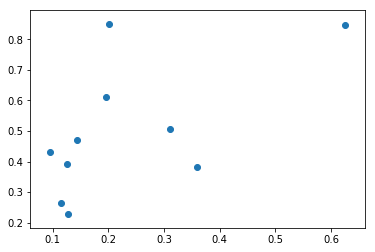

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y);

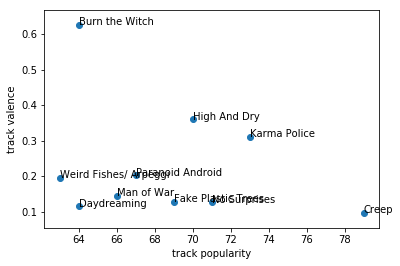

In [11]:
trackNames = []
trackNumber = []
trackPopularity = []
trackValence = []

radioheadID = '4Z8W4fKeB5YxbusRsdQVPb'
radioheadTopTracks = sp.artist_top_tracks(radioheadID)
for track in radioheadTopTracks['tracks'][:10]:
    trackNames.append(track['name'])
    trackPopularity.append(track['popularity'])
    audioFeature = sp.audio_features(tracks=[track['id']])
    trackValence.append(audioFeature[0]['valence'])

plt.scatter(trackPopularity, trackValence)

#https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
for i, txt in enumerate(trackNames):
    plt.annotate(txt, (trackPopularity[i],trackValence[i]))
    
plt.xlabel('track popularity')
plt.ylabel('track valence')

In [12]:
print sp.artist_albums(radioheadID, album_type=None, country=None, limit=20, offset=0)
#album_id for A Moon Shaped Pool: 6vuykQgDLUCiZ7YggIpLM9 

{u'items': [{u'album_type': u'album', u'name': u'OK Computer OKNOTOK 1997 2017', u'external_urls': {u'spotify': u'https://open.spotify.com/album/4ENxWWkPImVwAle9cpJ12I'}, u'uri': u'spotify:album:4ENxWWkPImVwAle9cpJ12I', u'href': u'https://api.spotify.com/v1/albums/4ENxWWkPImVwAle9cpJ12I', u'artists': [{u'name': u'Radiohead', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, u'uri': u'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb', u'href': u'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', u'type': u'artist', u'id': u'4Z8W4fKeB5YxbusRsdQVPb'}], u'images': [{u'url': u'https://i.scdn.co/image/9f858d307aa0bedbc2be9d4276ed39329d11ad92', u'width': 640, u'height': 640}, {u'url': u'https://i.scdn.co/image/819b35407ee4fe3da687cbacd8017b4448f0775b', u'width': 300, u'height': 300}, {u'url': u'https://i.scdn.co/image/9cc49b1c37b736ebcb7323f604fe81f3d0b64aa8', u'width': 64, u'height': 64}], u'type': u'album', u'id': u'4ENxWWkPImVwAle9cpJ12I', u'available

In [13]:
import json
aMoonShapedPoolID = '6vuykQgDLUCiZ7YggIpLM9'
aMoonShapedPoolAlbumTracks = sp.album_tracks(aMoonShapedPoolID)
print (json.dumps(aMoonShapedPoolAlbumTracks, indent=2))

{
  "items": [
    {
      "name": "Burn the Witch", 
      "external_urls": {
        "spotify": "https://open.spotify.com/track/3pcCifdPTc2BbqmWpEhtUd"
      }, 
      "uri": "spotify:track:3pcCifdPTc2BbqmWpEhtUd", 
      "explicit": false, 
      "preview_url": "https://p.scdn.co/mp3-preview/c5b0b198ee3f045960106e9957550e4610555d7d?cid=b4824c9f076d4840882936ac20120dce", 
      "track_number": 1, 
      "disc_number": 1, 
      "href": "https://api.spotify.com/v1/tracks/3pcCifdPTc2BbqmWpEhtUd", 
      "artists": [
        {
          "name": "Radiohead", 
          "external_urls": {
            "spotify": "https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb"
          }, 
          "uri": "spotify:artist:4Z8W4fKeB5YxbusRsdQVPb", 
          "href": "https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb", 
          "type": "artist", 
          "id": "4Z8W4fKeB5YxbusRsdQVPb"
        }
      ], 
      "duration_ms": 220609, 
      "type": "track", 
      "id": "3pcCifdPTc2BbqmWp

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.625, 0.115, 0.258, 0.153, 0.179, 0.0629, 0.354, 0.0545, 0.345, 0.0517, 0.0378]


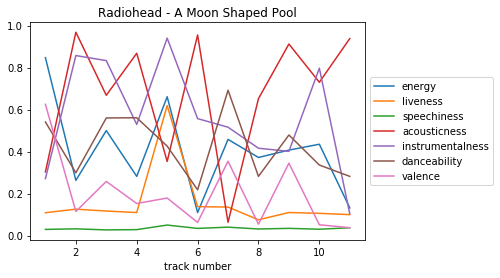

In [14]:
#Radiohead - A Moon Shaped Pool
trackNumber = []
trackEnergy = []
trackLiveness = []
trackTempo = []
trackSpeechiness = []
trackAcousticness = []
trackInstrumentalness = []
trackDanceability = []
trackLoudness = []
trackValence = []
for track in aMoonShapedPoolAlbumTracks['items']:
    #print (json.dumps(track, indent=2))
    #print track['id']
    audioFeature = sp.audio_features(tracks=[track['id']])
    trackNumber.append(track['track_number'])
    trackEnergy.append(audioFeature[0]['energy'])
    trackLiveness.append(audioFeature[0]['liveness'])
    trackTempo.append(audioFeature[0]['tempo'])
    trackSpeechiness.append(audioFeature[0]['speechiness'])
    trackAcousticness.append(audioFeature[0]['acousticness'])
    trackInstrumentalness.append(audioFeature[0]['instrumentalness'])
    trackDanceability.append(audioFeature[0]['danceability'])
    trackLoudness.append(audioFeature[0]['loudness'])
    trackValence.append(audioFeature[0]['valence'])
    #print x,y
print trackNumber
print trackValence

plt.plot(trackNumber, trackEnergy, label='energy')
plt.plot(trackNumber, trackLiveness, label='liveness')
#plt.plot(trackNumber, trackTempo, label='tempo')
plt.plot(trackNumber, trackSpeechiness, label='speechiness')
plt.plot(trackNumber, trackAcousticness, label='acousticness')
plt.plot(trackNumber, trackInstrumentalness, label='instrumentalness')
plt.plot(trackNumber, trackDanceability, label='danceability')
#plt.plot(trackNumber, trackLoudness, label='loudness')
plt.plot(trackNumber, trackValence, label='valence')
plt.xlabel('track number')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Radiohead - A Moon Shaped Pool')
